Initial setup

In [1]:
%run "Common setup.ipynb"

In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

In [3]:
corpora_df.loc[:, ~corpora_df.columns.isin(HIDE_COLUMNS)].to_csv('{}/corpora_rest.csv'.format(DATA_DIR))

In [4]:
# Checking if expected paper is in corpora
# corpora_df.loc[corpora_df['DOI'] == '10.1016/j.jocs.2015.08.008', :]

<hr>

Criteria analysis of filtered corpora: <br>
- Search papers in topic of interest by keyword
- Run criteria search on filtered corpora
- Plot trend in criteria matches

Plotting the publication trend of papers that have Global Sensitivity Analysis related keywords in their title, abstract and author supplied keywords (the 'searched fields')

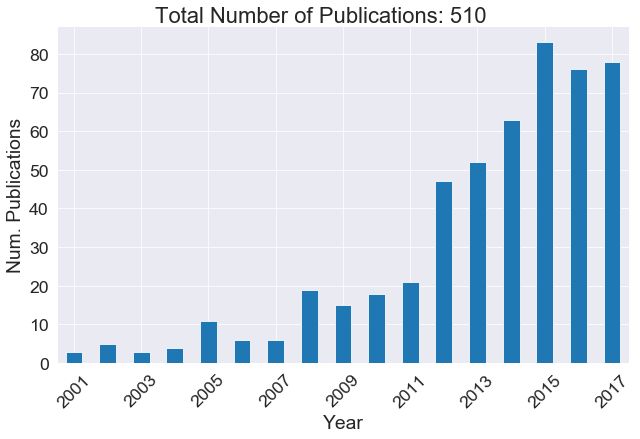

In [5]:
gsa_keywords = ['global sensitivity analysis', 'GSA', 'global sensitivity']
gsa_matches = wosis.keyword_matches(RC, gsa_keywords, threshold=95.0)
gsa_publications = gsa_matches.combine_recs()
gsa_publications.name = 'GSA'

wos_plot.plot_pub_trend(gsa_publications)

Papers with GSA related keywords occuring in the searched fields have been increasing, both in absolute and relative terms compared against the filtered corpora

No handles with labels found to put in legend.


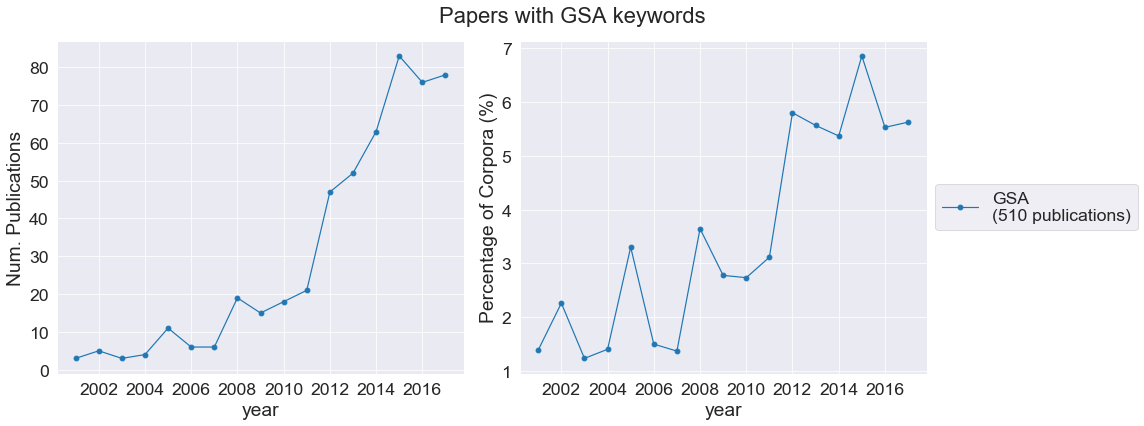

In [6]:
# Manually creating combined plots

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

wos_plot.plot_topic_trend([gsa_publications], 
                          title='Num. papers with GSA keywords',
                          ax=ax1)

wos_plot.plot_topic_trend([gsa_publications], 
                          total_rc=RC, 
                          title='',
                          ax=ax2)

plt.suptitle('Papers with GSA keywords',
             fontsize=22)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.savefig(FIG_DIR+'/Figure_11_gsa_publications.png')

In [7]:
# wos_plot.plot_topic_trend([gsa_publications], 
#                           total_rc=RC, 
#                           title='Papers with GSA keywords\n(Perc. of Filtered Corpora)', 
#                           save_plot_fn='{}/Figure_11b_gsa_relative.png'.format(FIG_DIR))

In [8]:
gsa_df = wosis.rc_to_df(gsa_publications)

In [9]:
gsa_df.loc[:, ~gsa_df.columns.isin(HIDE_COLUMNS)].to_csv('{}/gsa_matches_2000-2017.csv'.format(DATA_DIR))